In [11]:
import neo4j
import osmnx as ox

In [12]:
NEO4J_URI = "bolt://localhost:7689"
NEO4J_USER = "neo4j"
NEO4J_PASSWORD = "busticket123"

driver = neo4j.GraphDatabase.driver(NEO4J_URI, auth=(NEO4J_USER, NEO4J_PASSWORD))

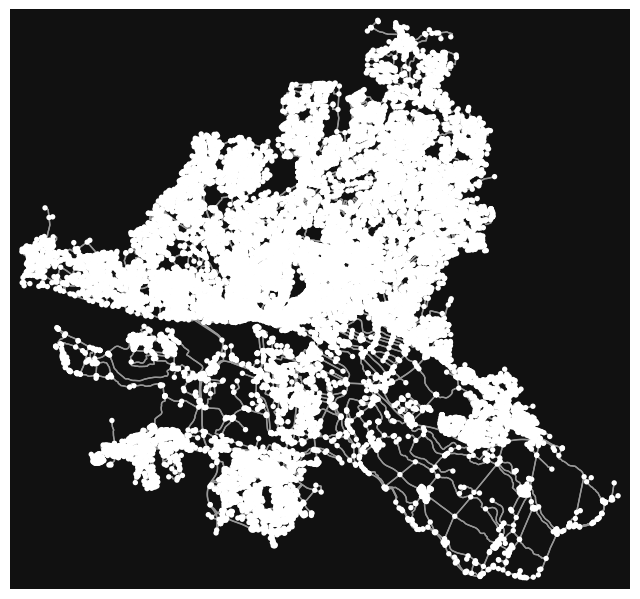

In [14]:
# Search OpenStreetMap and create a OSMNx graph
G = ox.graph_from_place("Hamburg, Deutschland", network_type="drive")

fig, ax = ox.plot_graph(G)

In [15]:
# Our road network graph can be represented as two GeoDataFrames
gdf_nodes, gdf_relationships = ox.graph_to_gdfs(G)
gdf_nodes.reset_index(inplace=True)
gdf_relationships.reset_index(inplace=True)

,osmid,y,x,street_count,highway,ref,junction,railway,geometry
0,122329,53.537493,10.031013,3,NaN,NaN,NaN,NaN,POINT (10.03101 53.53749)
1,122332,53.539048,10.032257,4,NaN,NaN,NaN,NaN,POINT (10.03226 53.53905)
2,122349,53.547938,9.985260,3,NaN,NaN,NaN,NaN,POINT (9.98526 53.54794)
3,122352,53.550002,9.971425,3,NaN,NaN,NaN,NaN,POINT (9.97143 53.55)
4,122353,53.550148,9.971098,4,NaN,NaN,NaN,NaN,POINT (9.9711 53.55015)
...,...,...,...,...,...,...,...,...,...
21986,2549929950,53.717256,10.084184,1,NaN,NaN,NaN,NaN,POINT (10.08418 53.71726)
21987,7461883445,53.713385,10.105389,1,NaN,NaN,NaN,NaN,POINT (10.10539 53.71338)
21988,7461893998,53.711733,10.106486,3,NaN,NaN,NaN,NaN,POINT (10.10649 53.71173)
21989,7937919173,53.713879,10.076980,4,NaN,NaN,NaN,NaN,POINT (10.07698 53.71388)


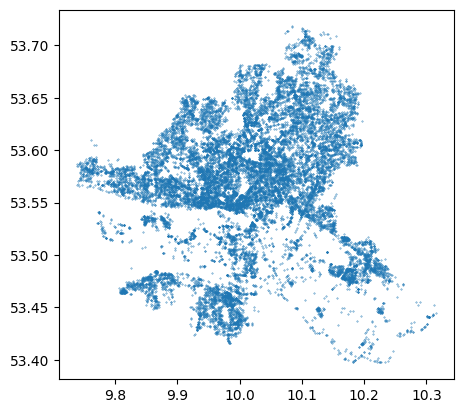

In [16]:
gdf_nodes.plot(markersize=0.1)
gdf_nodes

,u,v,key,osmid,highway,lanes,oneway,reversed,length,geometry,maxspeed,name,ref,width,bridge,junction,access,tunnel,est_width
0,122329,1423129453,0,"[646033702, 30372486, 190601547, 1266280855, 3...",trunk_link,"[1, 2]",True,False,193.829191,"LINESTRING (10.03101 53.53749, 10.03117 53.537...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,122329,250945247,0,884311147,trunk,5,True,False,65.489118,"LINESTRING (10.03101 53.53749, 10.03115 53.537...",50,Billhorner Brückenstraße,B 4;B 75,NaN,NaN,NaN,NaN,NaN,NaN
2,122332,1966813749,0,26961514,primary,5,True,False,17.575418,"LINESTRING (10.03226 53.53905, 10.03236 53.53919)",50,Billhorner Brückenstraße,B 75,NaN,NaN,NaN,NaN,NaN,NaN
3,122332,5704476350,0,264963989,primary,1,True,False,136.569834,"LINESTRING (10.03226 53.53905, 10.03223 53.539...",50,Billhorner Brückenstraße,B 75,NaN,NaN,NaN,NaN,NaN,NaN
4,122349,21765918,0,22672043,primary,3,True,False,73.932185,"LINESTRING (9.98526 53.54794, 9.98543 53.54787...",50,Ludwig-Erhard-Straße,B 4,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52721,7937919173,7937938187,0,850928478,primary,3,False,True,11.235562,"LINESTRING (10.07698 53.71388, 10.07686 53.71381)",70,Segeberger Chaussee,B 432,NaN,NaN,NaN,NaN,NaN,NaN
52722,7937919173,264400465,0,"[526161039, 1082137394, 45334106, 30280954, 45...",primary,"[3, 2]",False,False,634.849477,"LINESTRING (10.07698 53.71388, 10.07711 53.713...","[70, 100]",Segeberger Chaussee,B 432,NaN,NaN,NaN,NaN,NaN,NaN
52723,7937938187,7937919173,0,850928478,primary,3,False,False,11.235562,"LINESTRING (10.07686 53.71381, 10.07698 53.71388)",70,Segeberger Chaussee,B 432,NaN,NaN,NaN,NaN,NaN,NaN
52724,7937938187,264401212,0,"[58417329, 526161038]",primary,3,False,True,302.491642,"LINESTRING (10.07686 53.71381, 10.07667 53.713...",70,Segeberger Chaussee,B 432,NaN,NaN,NaN,NaN,NaN,NaN


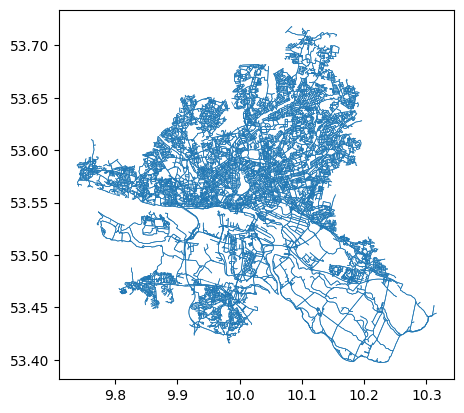

In [17]:
gdf_relationships.plot(markersize=0.01, linewidth=0.5)
gdf_relationships

In [18]:
# First, define Cypher queries to create constraints and indexes

constraint_query = "CREATE CONSTRAINT IF NOT EXISTS FOR (i:Intersection) REQUIRE i.osmid IS UNIQUE"

rel_index_query = "CREATE INDEX IF NOT EXISTS FOR ()-[r:ROAD_SEGMENT]-() ON r.osmids"

address_constraint_query = "CREATE CONSTRAINT IF NOT EXISTS FOR (a:Address) REQUIRE a.id IS UNIQUE"

point_index_query = "CREATE POINT INDEX IF NOT EXISTS FOR (i:Intersection) ON i.location"

# Cypher query to import our road network nodes GeoDataFrame

node_query = '''
    UNWIND $rows AS row
    WITH row WHERE row.osmid IS NOT NULL
    MERGE (i:Intersection {osmid: row.osmid})
        SET i.location = 
         point({latitude: row.y, longitude: row.x }),
            i.ref = row.ref,
            i.highway = row.highway,
            i.street_count = toInteger(row.street_count)
    RETURN COUNT(*) as total
    '''

# Cypher query to import our road network relationships GeoDataFrame

rels_query = '''
    UNWIND $rows AS road
    MATCH (u:Intersection {osmid: road.u})
    MATCH (v:Intersection {osmid: road.v})
    MERGE (u)-[r:ROAD_SEGMENT {osmid: road.osmid}]->(v)
        SET r.oneway = road.oneway,
            r.lanes = road.lanes,
            r.ref = road.ref,
            r.name = road.name,
            r.highway = road.highway,
            r.max_speed = road.maxspeed,
            r.length = toFloat(road.length)
    RETURN COUNT(*) AS total
    '''

In [19]:
# Function to execute our constraint / index queries

def create_constraints(tx):
    results = tx.run(constraint_query)
    results = tx.run(rel_index_query)
    results = tx.run(address_constraint_query)
    results = tx.run(point_index_query)



In [20]:
# Function to batch our GeoDataFrames
def insert_data(tx, query, rows, batch_size=10000):
    total = 0
    batch = 0
    
    while batch * batch_size < len(rows):
        results = tx.run(query, parameters = {'rows': rows[batch*batch_size:(batch+1)*batch_size].to_dict('records')}).data()
        print(results)
        total += results[0]['total']
        batch += 1

In [21]:
# Run our constraints queries and nodes GeoDataFrame import
with driver.session() as session:
    session.execute_write(create_constraints)
    session.execute_write(insert_data, node_query, gdf_nodes.drop(columns=['geometry'])) #FIXME: handle geometry

[{'total': 10000}]
[{'total': 10000}]
[{'total': 1991}]


In [22]:
# Run our relationships GeoDataFrame import
with driver.session() as session:
    session.execute_write(insert_data, rels_query, gdf_relationships.drop(columns=['geometry'])) #FIXME: handle geometry

[{'total': 10000}]
[{'total': 10000}]
[{'total': 10000}]
[{'total': 10000}]
[{'total': 10000}]
[{'total': 2726}]
